<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/3_building_blueprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building Blueprint: Floor Plan Representations**

This tutorial is about representing the layout's of floor plans (floor layouts) as composed shapes, raster images, and (attributed) access graphs, or combinations thereof, and how to represent such formats in code. The following gives a visual overview of the 3rd (out of 7) tutorials on _artificial intellingence in architectural design_.

<center>
<img src="https://drive.google.com/uc?export=view&id=1BNq5ejLbimmI2TE1Bmg_-TrOgUwP_yMt" alt="floor-layout" class="center" width="1200px">
</center>

## **Why different representations?**

Before we go to the overview and learning objectives of the tutorial, let's try to make it clear why it is **useful to have explicit access to different representations of the floor plan**.  

When you - as an architect (in the making) - look at a pictiorial representation of a floor plan, you directly make an enormous amount of connections to many concepts and ideas in your mind that relate to architectural qualities as you know / learned them. First of all, you see directly whether it is a floor plan or not. Next, you might be able to have a reasonable say in the typology of the building *eg* whether it is residential or not, and if yes, whether it is a villa, a terraced house, or an apartment complex. By looking longer at it, you might imagine how you could move through the building the floor plan resembles, or you might even imagine how it would look like in 3D, or where you would put the furniture if not already present. You might next, discuss (with yourself or others) why certain decisions were made (or: why not). The longer you look, the more complex and abstract levels of architectural knowledge come into play. For us, the pictorial image is not merely black and white, but, on the contrary, alive.

In other words, **you go beyond just seeing the values of the pixels** - that which the pictorial image in essence only explicitly conveys. You make use of information that you unconsciously extract from the values of the pixels, and combine it with information in your brain (the concept of a door, a wall, etc.) to be able to investigate the meaning behind the pictorial image (*eg* the qualities of the floor plan).

And now it becomes interesting. **Some of the more abstract yet informative features that you unconsciously extract from the pictorial image are, to a large extent, similar, if not equivalent, among most people**. For example, the elements of the layouts: rooms, windows, doors, walls, etc. And, on top of that, the connectivity, proportions, and orientations of the rooms. Or, whether a door is large enough *st* two peole can walk through it at the same time. Again: such informative features are not explicitly defined in digital memory if you have the pictorial image only.

**To help to computer solve complex tasks on floor plans, such as finding compositionality similar floor plans, it is important to leverage these more abstract features (or attributes), in a similar fashion as we humans do**. We elaborate on two representations that convey exactly such more abstract features. Namely, the composed shape - making explicit the shapes, proportions, and locations of the spaces - and the access graph - making explicit the connections between the spaces.



## 📌 **Overview and learning objectives**

This tutorial is about floor plan representation, how these representation relate to each other, and how to convert (extract) one to (from) the other. The tutorial starts by revisiting the shape-based representation explored in TW1 - conceptualized as **composed shape** - and explains how such a representation can be extracted from the data frame defined in TW2 (topic 1). The composed shape is further converted into an **image** - one of the most commonly used data formats (topic 2). Finally an **access graph** is extracted from the composed shape representation to make explict the relations between the individual spaces that compose the layout (topic 3) . In the assignment you are asked to extract each representation at *unit level* for each floor in the building, and populate a logically-structured folder system with these data points.

### 🧠 **Learning objectives**
- Describe a floor layout as a composed shape, an image, and an access graph
- Effectively represent a composed shape, an image, and an access graph in Python objects
- Create rasterized images from the composed shape representation
- Extract access graph from the composed shape representation
- Create a folder system using code and populate the folders with data

### 🐍 **New in Python** (wrt previous tutorials)
- data structures: `nx.graph.Graph()`
- libraries: `shapely`, `networkx`, `pickle`

### ♌ [**Layout as a composed shape**](#t1)
- [The composed shape](#t1.1)
- [Spaces, doors, windows, & openings](#t1.2)
- [Separate apartments](#t1.3)

### ♒ [**Layout as a image**](#t2)
- [The image: a 2D / 3D array of pixels](#t2.1)
- [Layouts as images](#t2.2)
- [Drawing the layouts on a canvas](#t2.3)

### ♈ [**Layout as a access graph**](#t3)
- [The access graph](#t3.1)
- [Graph extraction](#t3.2)
- [Attributed access graphs](#t3.3)

### 🈴 [**Assignment: appending dataset**](#a)


<a name="t1"></a>
## ⏹ **Layout as a composed shape**

In the first part of the tutorial, the shape-based representation, which was explored in TW1, is revisited - coined as the composed shape representation of a floor layout.

**Note that the lines of code that are near repetitions of previous tutorials are not always commented.**

<a name="t1.1"></a>
### 1.1 **The composed shape**

In the previous tutorial (TW2) you have learned to extract floor plans from your respective projects. The floor plans are structured as dataframes that contain — per row — information of the respective layout elements (see TW1 for the definition of a layout element).

We call this floor layout representation a **composed shape**. By definition in shape theory and analysis, a composed shape consists of linked sub-shapes. If we regard a floor layout as a composed shape, the sub-shapes are the layout elements and the links are the walls that are shared across exactly two such sub-shapes. (There are no wall elements that link three or more spaces; and there are no wall elements that link only on space, because by definition a link is between at least two elements.)

</br>

<center>
<img src="https://drive.google.com/uc?export=view&id=1cs2AL0D87xNiqZV7g1G6NRsWXsb7Dny6" alt="floor-layout" class="center" width="500px">
</center>

Let's load one of the projects, similar to TW2. First connect the drive:



In [1]:
#importing drive and os libraries
from google.colab import drive
import os

#mounting google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Now load the 3rd floor:

In [2]:
# importing the geopandas library
import os
import pandas as pd
import geopandas as gpd

# set data path
data_path = "/content/drive/MyDrive/academia/8 data/KAAN_datasets/STRIJP"
os.chdir(data_path)
print(os.getcwd)

# name of the file as the variable; read csv and convert to pandas
floor_name = "06 zesde verdieping"
file_path = floor_name+".csv"
strijp_df = pd.read_csv(file_path)


# print first 5
strijp_df.head()

<built-in function getcwd>


,type,name,geometry
0,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4945851:1,"MULTIPOLYGON (((14.035 10.19, 13.935 10.19, 13..."
1,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946117:1,"MULTIPOLYGON (((37.11 12.76, 37.11 12.86, 38.1..."
2,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946126:1,"MULTIPOLYGON (((38.165 11.23, 38.265 11.23, 38..."
3,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4945842:1,"MULTIPOLYGON (((14.05 12.76, 14.05 12.86, 15.0..."
4,IfcOpeningElement,K_31_WIN_WB_Aluminum_Regular_fixed:WI.xxxx_700...,"MULTIPOLYGON (((31.115 11.4, 31.495 11.4, 31.4..."


This is all the *geometrical* information we have. As we have seen in TW2, there are several element types, *e.g.* `IfcSpace`, `IfcDoor`:

In [3]:
# extract unique element types
element_types = strijp_df.type.unique()
print(*element_types, sep='\n')  # the asterix (*) unpacks the list, as if you input el_1, el_2, el_3, ... to the print() function

IfcOpeningElement
IfcWall
IfcBuildingElementProxy
IfcDoor
IfcFurnishingElement
IfcColumn
IfcWindow
IfcFurniture
IfcSpace


For this tutorial, we need only the spaces (`IfcSpace`), doors (`IfcDoor`), and windows (`IfcWindow`).

In [4]:
spaces_df = strijp_df[strijp_df["type"] == "IfcSpace"]
doors_df = strijp_df[strijp_df["type"] == "IfcDoor"]
windows_df = strijp_df[strijp_df["type"] == "IfcWindow"]

# check datframe of spaces
spaces_df.head()

,type,name,geometry
806,IfcSpace,74,"MULTIPOLYGON (((20.28 24.11, 20.28 25.16, 20.9..."
807,IfcSpace,75,"MULTIPOLYGON (((22.5 26.07, 23.7 26.07, 23.7 2..."
808,IfcSpace,76,"MULTIPOLYGON (((30.085 26.32, 31.26 26.32, 31...."
809,IfcSpace,72,"MULTIPOLYGON (((20.68 31.49, 31.52 31.49, 31.5..."
810,IfcSpace,73,"MULTIPOLYGON (((42.69 26.28, 36.665 26.28, 36...."


<a name="t1.2"></a>
### 1.2 **Spaces, doors, windows & openings**


In [5]:
# check unique names of spaces
print("Number of spaces:\t\t\t", len(spaces_df))
print("Number of unique spaces:\t", spaces_df.name.nunique())
print("Unique spaces:\t\t", *list(spaces_df.name.unique()), sep="\t")

Number of spaces:			 81
Number of unique spaces:	 81
Unique spaces:			74	75	76	72	73	70	71	67	68	69	65	66	201	06.E07.01	06.E05.04	06.E05.03	06.E05.02	06.E05.01	06.E04.01	06.E01.01	06.D07.03	06.D07.02	06.D07.01	06.D06.05	06.D06.04	06.D06.03	06.D06.02	06.D06.01	06.D05.03	06.D04.01	06.D03.03	06.D01.03	06.D01.02	06.D01.01	06.C07.01	06.C06.06	06.C06.05	06.C06.04	06.C06.03	06.C06.02	06.C06.01	06.C05.02	06.C05.01	06.C04.01	06.C03.02	06.C03.01	06.C02.41	06.C02.40	06.C02.39	06.C02.38	06.C02.37	06.C02.36	06.C02.18	06.C02.17	06.C02.16	06.C02.15	06.C02.14	06.C02.12	06.C02.11	06.C02.10	06.C02.06	06.C02.05	06.C02.04	06.C02.03	06.C02.02	06.C02.01	06.C01.01	06.B07.02	06.B07.01	06.B06.04	06.B06.02	06.B06.01	06.B05.01	06.B03.01	06.B02.04	06.B02.02	06.B02.01	06.B01.02	06.B01.01	06.A07.01	06.A01.01


As explained in TW2, spaces are either rooms (or other areas like corridor / hallway, etc.) *or* spaces that encompass other spaces, typically units — the complete part of an apartment for the floor.

In the KAAN projects, the rooms have a more complex name (`buildingstory.gridintersection.sequence`) and the units have a simple integer-like value. Let's separate the spaces further into rooms and units.

In [6]:
# filter rooms and units separately
rooms_df = spaces_df[spaces_df["name"].str.contains("\.")] # also str.contains("\.", regex=True) works
units_df = spaces_df[spaces_df["name"].str.len() == 2]

# check unique names of spaces
print("Number of units:\t\t", len(units_df))
print("Number of unique units:\t", units_df.name.nunique())
print("Unique names of units:\t", *list(units_df.name.unique()), sep="\t")

Number of units:		 12
Number of unique units:	 12
Unique names of units:		74	75	76	72	73	70	71	67	68	69	65	66


In [7]:
rooms_df.head()

,type,name,geometry
819,IfcSpace,06.E07.01,"MULTIPOLYGON (((42.785 31.59, 42.785 28.995, 4..."
820,IfcSpace,06.E05.04,"MULTIPOLYGON (((37.74 26.295, 36.805 26.295, 3..."
821,IfcSpace,06.E05.03,"MULTIPOLYGON (((35.58 28.14, 35.58 29.18, 38.1..."
822,IfcSpace,06.E05.02,"MULTIPOLYGON (((42.565 28.95, 42.565 31.365, 4..."
823,IfcSpace,06.E05.01,"MULTIPOLYGON (((28.49 31.485, 28.805 31.485, 2..."


Let's create the two corresponding geopandas data frames (`gpd.GeoDataFrame`), and plot both on top of each other using the method `.plot`:

In [8]:
from shapely import wkt

# let's create a function that outputs a geopandas dataframe from pandas dataframe
# see TW2 for details
def convert_df_to_gdf(df, column_geom='geometry'):
    geometry = df['geometry'].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=None)
    return gdf

# convert pandas to geopandas data frame
rooms_gdf = convert_df_to_gdf(rooms_df)
units_gdf = convert_df_to_gdf(units_df)
doors_gdf = convert_df_to_gdf(doors_df)
windows_gdf = convert_df_to_gdf(windows_df)

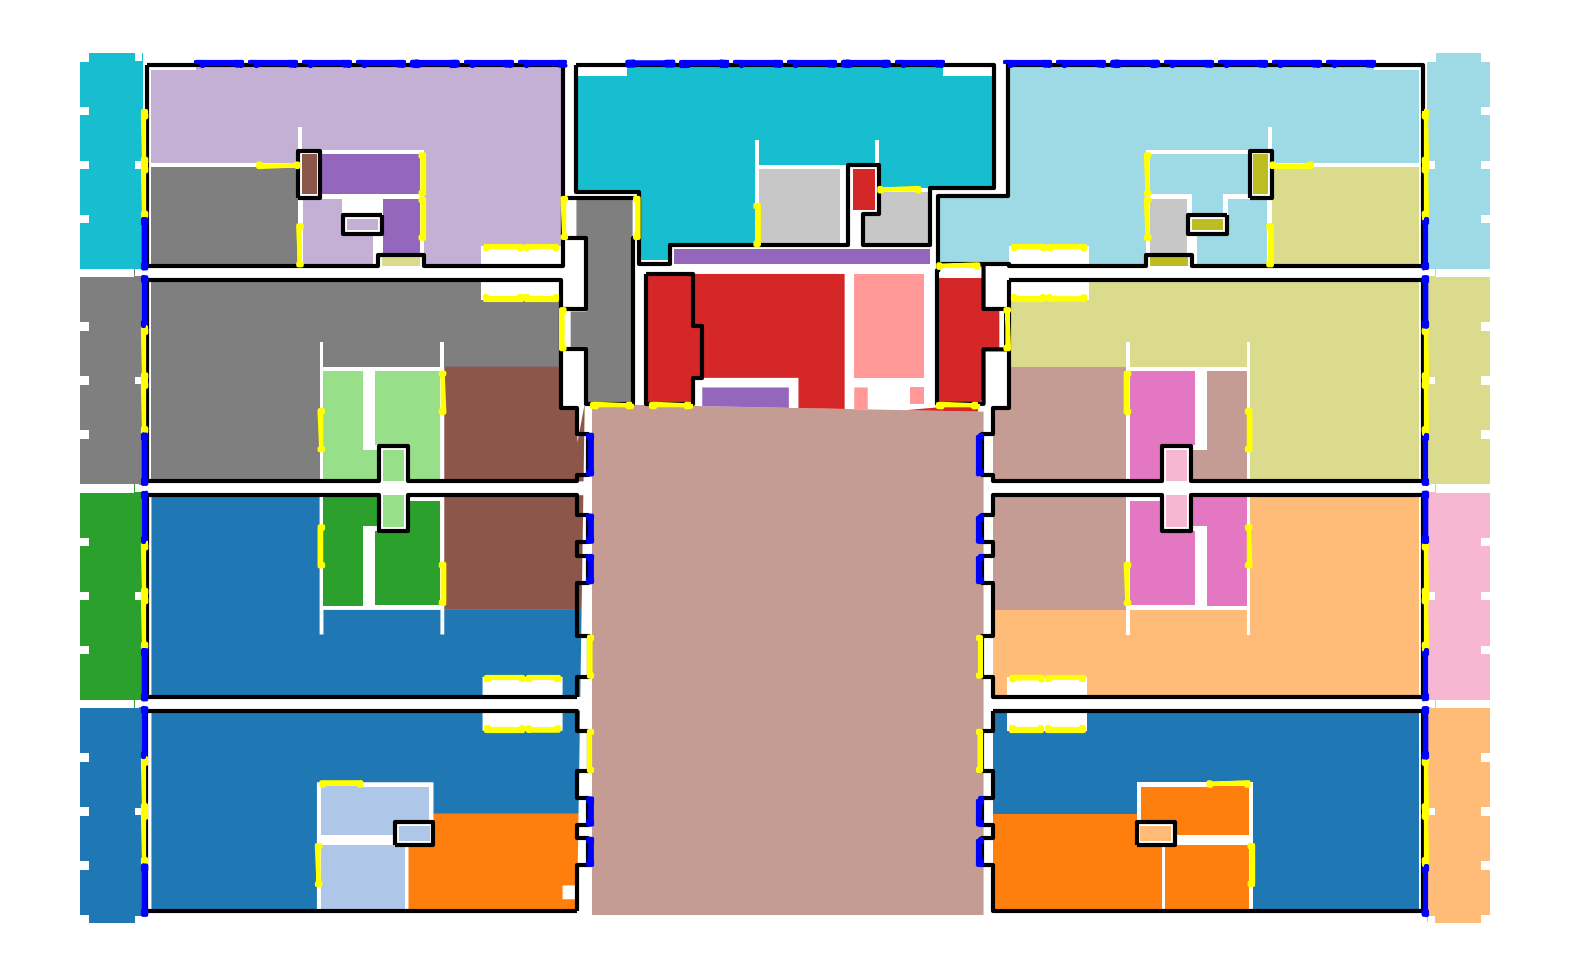

In [9]:
import matplotlib.pyplot as plt

# create figure such that you can reuse the same axis for both the room and unit plots
fig, ax = plt.subplots(figsize=(20, 20))
ax.axis('off')

# plotting the rooms
# if you want to plot two different chloropleth maps in the same figure, you have to specify the "ax" argument in the plot method
# _ = is used to omit the output <Axes: > (or similar)
_ = rooms_gdf.plot(ax=ax, column="name", legend=False, cmap="tab20", figsize=(10, 10))  # legend is false ... because

# plotting the units
_ = units_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=3)
_ = doors_gdf.plot(ax=ax, column="name", legend=False, edgecolor='yellow', facecolor="none", linewidth=3)
_ = windows_gdf.plot(ax=ax, column="name", legend=False, edgecolor='blue', facecolor="none", linewidth=3)
# _ = openings_gdf.plot(ax=ax, column="name", legend=False, edgecolor='green', facecolor="none", linewidth=3)

# Show the plot
plt.show()

<a name="t1.3"></a>
### 1.3 **Separate units**

Add content text and code here.


Interestingly, the balconies are not within the units. We add them later.

We can now filter the layout of each unit by looping over the different units and adding the rooms (+doors and windows) for which the shape intersects with the shape of the unit. To be able to work with the data, we represent the composed layout of the unit as a dictionary of room names (keys) with values (shapes, type) - similar to how we structured a layout in TW1. The type attribute specifies the type of element: `room`, `door`, `window`. We will add the color (based on the roomtype) later on.

The intersection of two polygons can be computed by an intrinsic-to-the-polygon method called `intersection`, which outputs the polygon of the intersection, followed by a method called `area` that computes the area of that polygon. (`poly1.intersection(poly2)` or vice versa as `poly2.intersection(poly1)`.) If the intersection between two shapes is 0, the shapes do not have any overlap. This condition will be checked using an `if` statement and rooms are only associated with the unit if the overlap is larger than a particular threshold (which we set to 0.1 m$^2$).

The following code iterates through all the units and gathers the elements from the room, door, and window data frames:





In [10]:
import shapely
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import unary_union

# TODO: add to self-curated library
def get_elements_in_unit(unit_poly, element_gdf, element_type="room",
                                         t_overlap=0.3, window_buffer=0.2):
    """
    Function that extracts and arranges all elements
    from a full floor layout as dataframe for a particular layout
    """

    # initialize unit as empty dictionary
    unit = {}
    for _, element in element_gdf.iterrows():
        poly = element.geometry

        # make sure the polygon is valid; if not, buffer by 0 to make valid
        if not poly.is_valid:
            poly = poly.buffer(0)

        if (poly.area < 1) & (element_type == "room"):
            continue

        # windows usually have only a tiny bit of overlap, so buffer by 0.2m to make bigger (in all directions).
        if element_type == "window":
            window_poly = poly.buffer(window_buffer)
            intersection = unit_poly.intersection(window_poly)
        else:
            intersection = unit_poly.intersection(poly)

        # an overlap of at least 0.3m2
        if intersection.area / poly.area > t_overlap:

            # add room (by name) to dictionary; values are shape and type
            name = element["name"]
            unit[name] = poly
        else:
            pass

    return unit

# we will gather all the dictionaries that represent the units in a list
units_polygon = []
units_name = []
units_rooms = []
units_doors = []
units_windows = []

# loop through all units in the units dataframe and create a dictionary for each
for _, elem_unit in units_gdf.iterrows():

    #extract polygonial shape of the unit; unary union to get POLYGON object
    unit_name = elem_unit["name"]
    unit_poly = elem_unit.geometry
    unit_poly = unary_union(unit_poly)

    # get dictionary for rooms
    unit_rooms = get_elements_in_unit(unit_poly, rooms_gdf, element_type="room")

    # make sure the unit contains at least 2 rooms
    if len(unit_rooms) > 2:
        units_polygon.append(unit_poly)
        units_name.append(unit_name)
        units_rooms.append(unit_rooms)
        # get dictionary for doors
        unit_doors = get_elements_in_unit(unit_poly, doors_gdf, element_type="door")
        units_doors.append(unit_doors)
        # get dictionary for windows
        unit_windows = get_elements_in_unit(unit_poly, windows_gdf, element_type="window")
        units_windows.append(unit_windows)
    else:
        pass

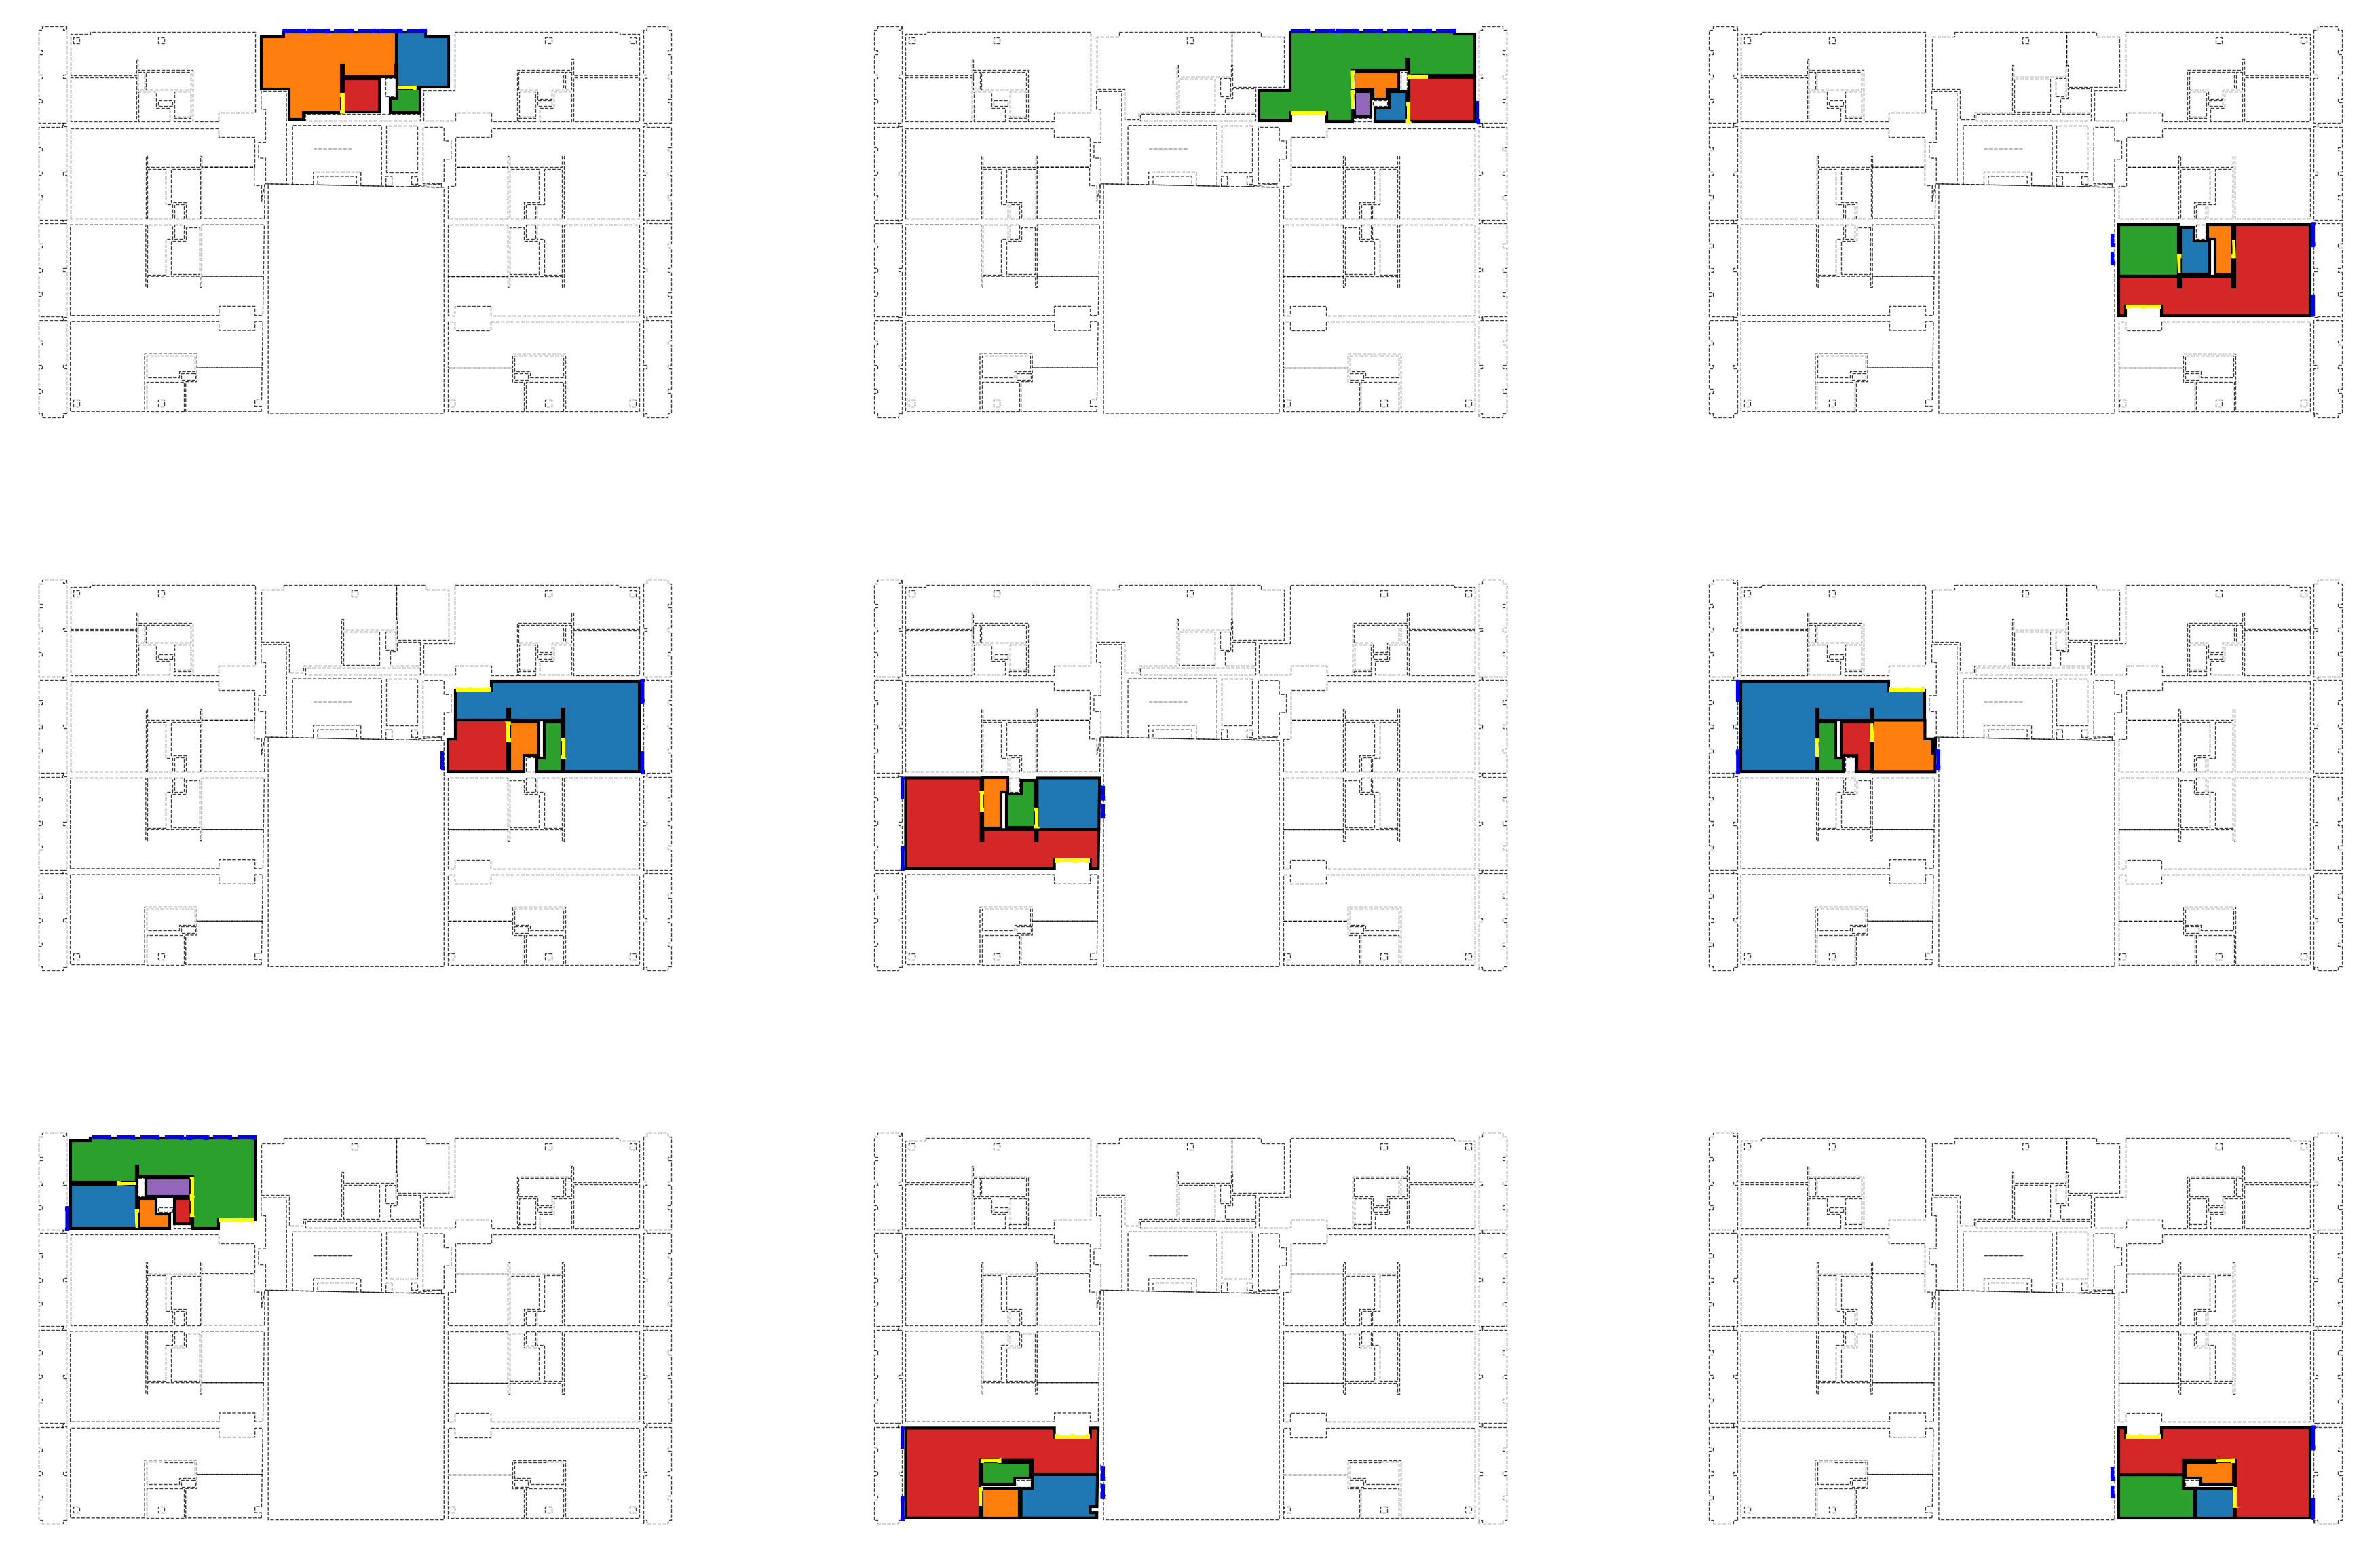

In [11]:
import numpy as np
from shapely.geometry import Polygon

# TODO: add to self-curated library
def plot_polygon_shapely(ax, poly, **kwargs):  # **kwargs can be used to pass arguments to another function that you use inside; in this case for plotting make up
    try:  # if multipolygon
        for sub_poly in poly.geoms:
            x, y = sub_poly.exterior.xy
            ax.fill(x, y, **kwargs)  # create a plot
            # note that this function does not have a return, because we don't need an output, we want a plot
    except: # if polygon
        x, y = poly.exterior.xy
        ax.fill(x, y, **kwargs)  # create a plot

# set up plot
k = int(np.ceil(np.sqrt(len(units_rooms))))  # determine amount of subplots on the amount of distinct units
_, axs = plt.subplots(k, k, figsize=(15*k, 10*k))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
axs = axs.flatten()

# iterate through units
for i in range(len(units_rooms)):
    # 1. get current axis
    ax = axs[i]

    # 2. get rooms, doors, windows for unit "i"
    rooms = units_rooms[i]
    doors = units_doors[i]
    windows = units_windows[i]

    # 3. plot full layout for each (see TW2)
    _ = rooms_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=1, linestyle='dashed', alpha=0.75)

    # 4. plot units separately
    # 4.1 spaces (default color: RANDOM)
    for poly in rooms.values():
        plot_polygon_shapely(ax, poly, ec='black', linewidth=3, linestyle='solid')

    # 4.2 doors (default color: YELLOW)
    for poly in doors.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='yellow', linewidth=3, linestyle='solid')

    # 4.3 windows  (default color: BLUE)
    for poly in windows.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='blue', linewidth=3, linestyle='solid')

    # 5. set axis
    ax.set_aspect('equal')
    ax.axis('off')

<a name="t2"></a>
## 🎨 **Layout as an image**



<a name="t2.1"></a>
### 2.1 **Vector to raster: the pixelated image**

Most frequently, floor plans are represented and stored as **images**. Especially older / later-digitized floor plans. The **image is composed of a grid of pixels**, where each pixel represents a tiny area of the floor plan. The resolution of the image (how many pixels wide and tall it is) will determine the level of detail that can be captured. Higher resolution images can represent more detailed floor plans.

</br>

<center>
<img src="https://drive.google.com/uc?export=view&id=1D-dYaLOgcsN83DLP3sQs2NqrZCQTmHQU" alt="floor-layout" class="center" width="500px">
</center>

> ***But wait, what is the difference between an image and composed shape if they are both represented as arrays?***

Because the arrays are differently structured and should be read differently. Images use arrays to store intensity values for pixels across potentially three dimensions (including color channels), while shapes use arrays to store coordinates of vertices in a two-dimensional space:

</br>

<center>
<img src="https://drive.google.com/uc?export=view&id=1nKDnVEx7T63P-Pld3Eb3bu8jqOerdM5r" alt="floor-layout" class="center" width="500px">
</center>

> ***What is the difference in resolution of a composed shape-based representation and that of an image ?***

The resolution of a composed shape is infinte (try zooming in PPT or Illustrator for example and you'll see the "endlesness" of the resolution), while the resolution of an image is _always_ finite. Furthermore, the data storage needed to save a rasterized image is much larger than that of a set of simple shapes. (At least in most cases for floor layouts.)

> ***So why go for a rasterized image?***

Well, a couple of reasons:

- **Photorealism**. Rasterized images are capable of displaying complex, photorealistic images with subtle gradients and a wide range of colors. This is ideal for floor plans in which you want to show many elements (e.g. furniture, materialization, people).
- **Compatibility and standard**. Rasterized images are widely supported across almost all devices and platforms without the need for specialized software to view them. This makes them highly accessible for a broad audience.
- **Machine learning**.  A vast majority of the data available for training machine learning models, especially in the domain of computer vision, is in rasterized form. This means that state-of-the-art and easy-to-grab models (DALL-E, Midjourney, etc.) work only with rasterized images. Most of these neural networks are image-based. This means that either the input (_eg_ visual search, or captioning) or output (_eg_ generated image) is a rasterized image.

So let's make them !

<a name="t2.2"></a>
### 2.2 **Unit layouts as images**

Let's first plot the individual units below.


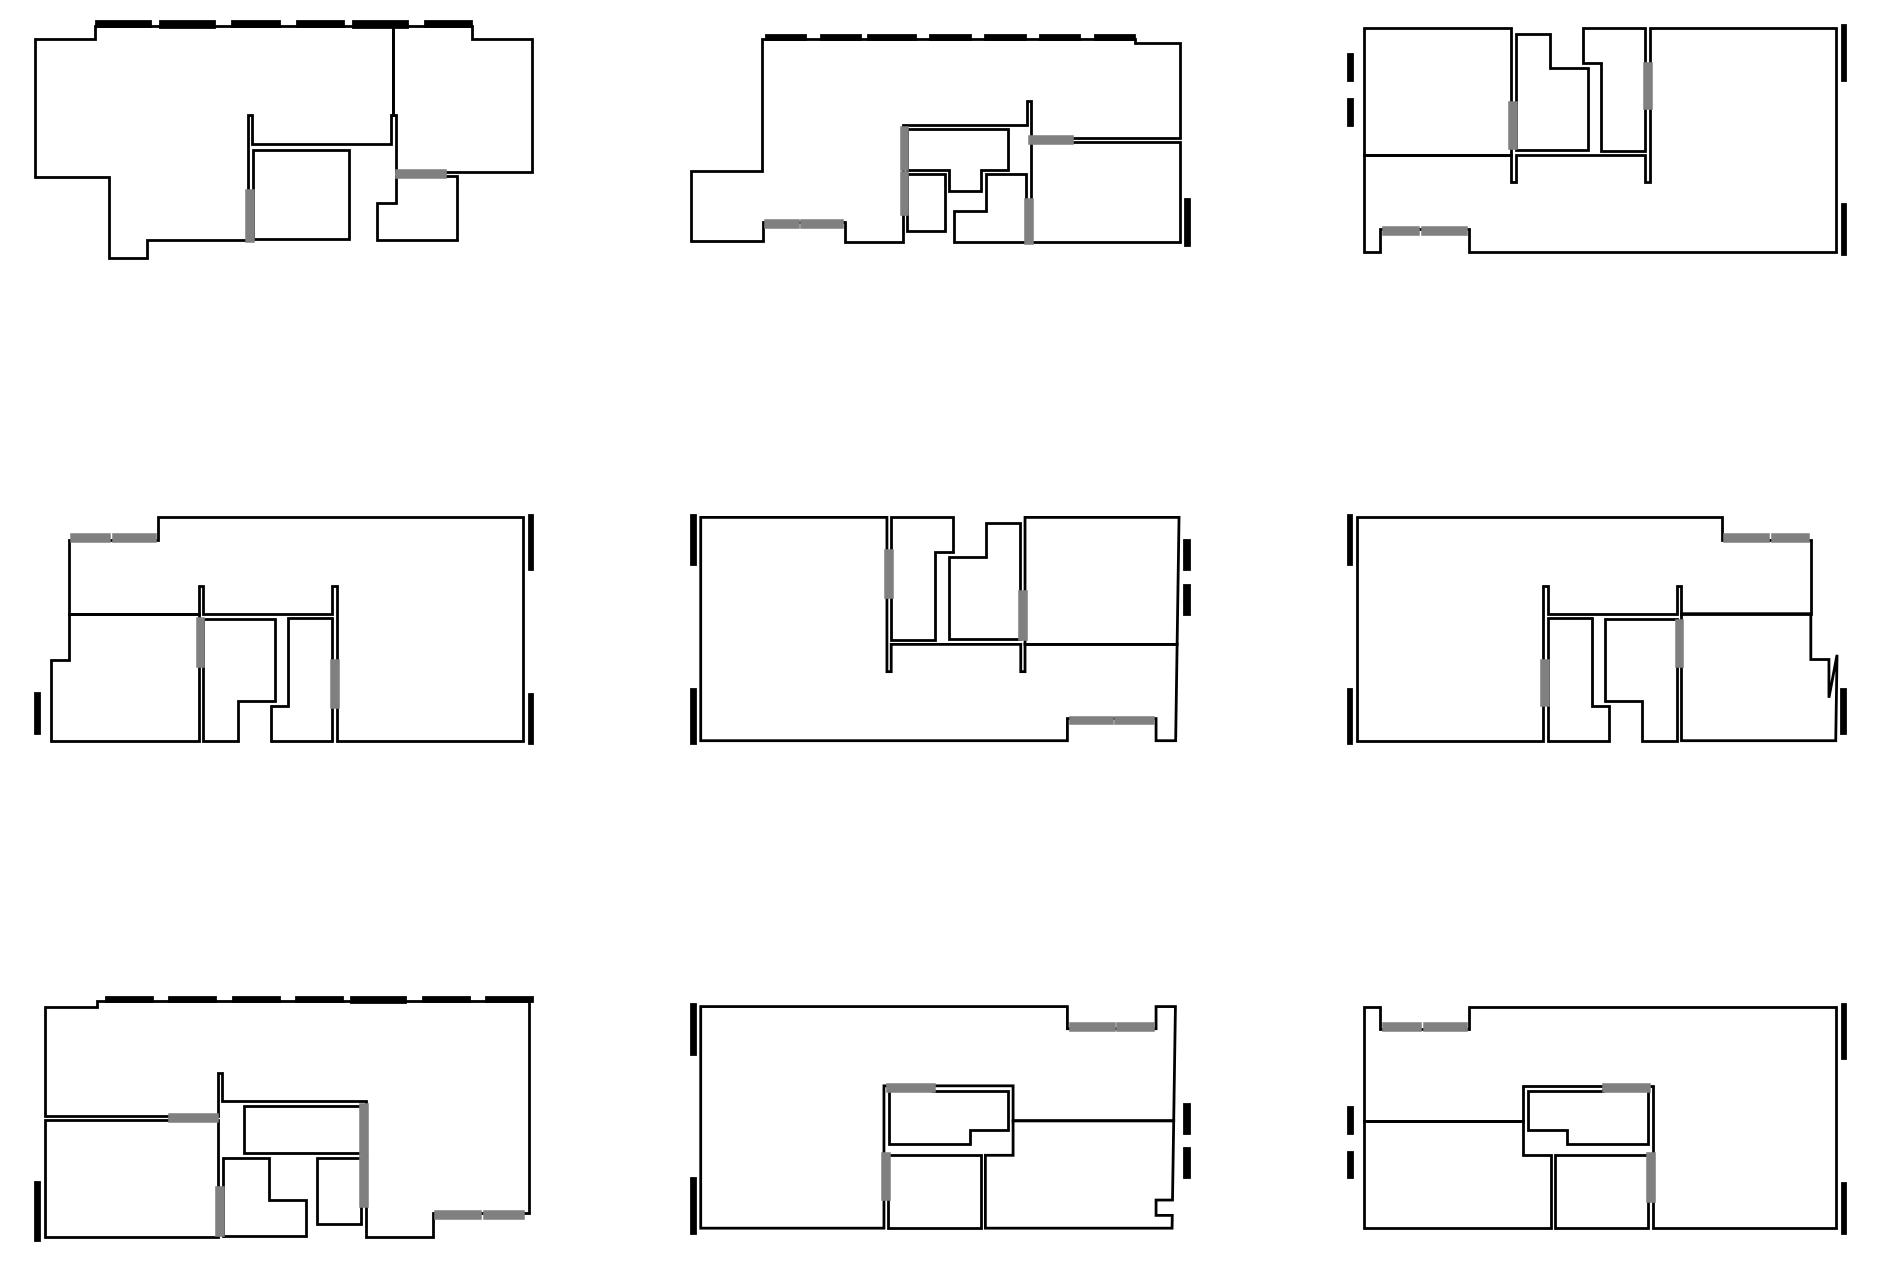

In [12]:
# set up plot
k = int(np.ceil(np.sqrt(len(units_rooms))))  # determine amount of subplots on the amount of distinct units
_, axs = plt.subplots(k, k, figsize=(8*k, 6*k))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
axs = axs.flatten()

# iterate through units
for i in range(len(units_rooms)):
    # 1. get current axis
    ax = axs[i]

    # 2. get rooms, doors, windows for unit "i"
    rooms = units_rooms[i]
    doors = units_doors[i]
    windows = units_windows[i]

    # 3. plot full layout for each (see TW2) - REMOVE THIS
    # _ = rooms_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=1, linestyle='dashed', alpha=0.75)

    # 4. plot units separately
    # 4.1 spaces
    for poly in rooms.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='black', linewidth=2, linestyle='solid')

    # 4.2 doors
    for poly in doors.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="gray", ec='gray', linewidth=4, linestyle='solid')

    # 4.3 windows
    for poly in windows.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="black", ec='black', linewidth=2, linestyle='solid')

    # 5. set axis
    ax.set_aspect('equal')
    ax.axis('off')

<a name="t2.3"></a>
### 2.3 **Drawing layouts on a canvas**

For developing the images, we first create a sub-folder where they will be stored:


In [13]:
# create a sub-directory
img_dir = os.path.join(data_path, "dataset/layouts/units/images")
os.makedirs(img_dir, exist_ok=True)

# note: your current working directory has not changed

We will make use of the `matploblib` library to save the images. Behind the scene, `matploblib` already does this: otherwise it would not have been able to show you the shapes in the output (your screen is a collection of pixels!). Since it is quite trivial how shapes can be stored in a grid of pixels (see example of the "rasterized" vs. "vectorized" before), we won't bother you with how this conversion is done.

In `matploblib` you first have to createa a figure (_eg_ `fig, ax = plt.subplots(1,1)`). If you have plotted some shapes inside it, you can simply call `fig.savefig(img_path)` to save the image at the specified path, which is `img_path` in our case. You can set the resolution by increasing the DPI argument _eg_ `dpi=300`. For more image saving settings, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html.

For the name of the figure, we choose the combination of floor and unit name as:
`"floor=<floor_name>-unit=<unit_name>.png"`. If `matploblib` sees `.png` at the end, it will know to create a PNG-formatted image.

Let's do it:

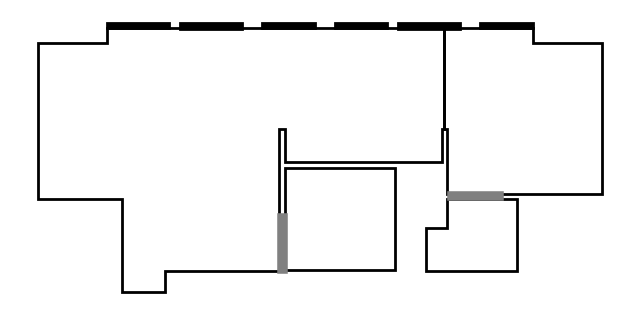

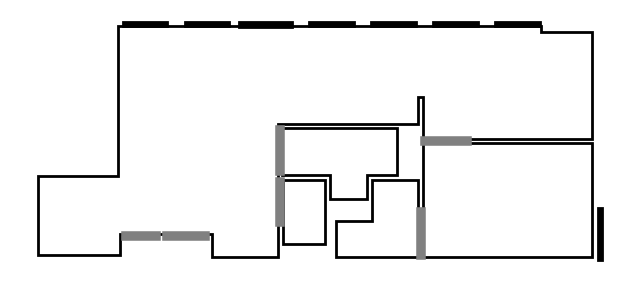

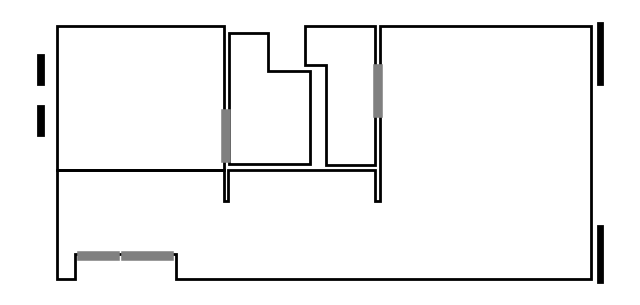

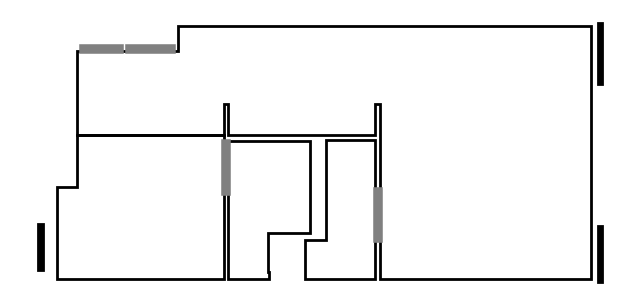

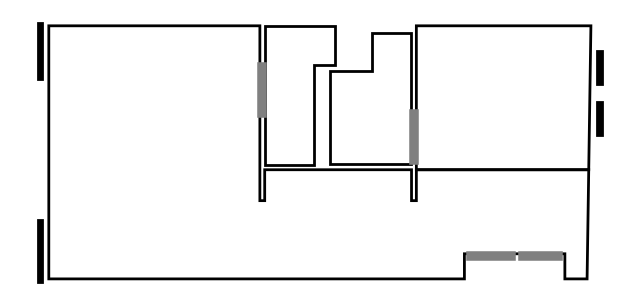

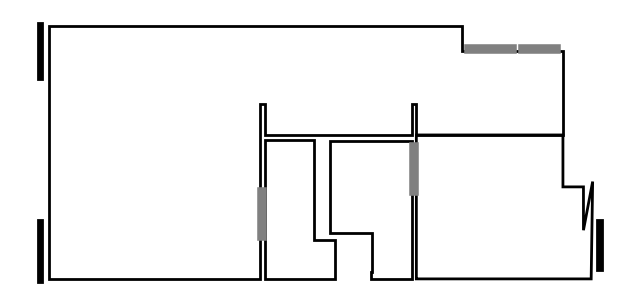

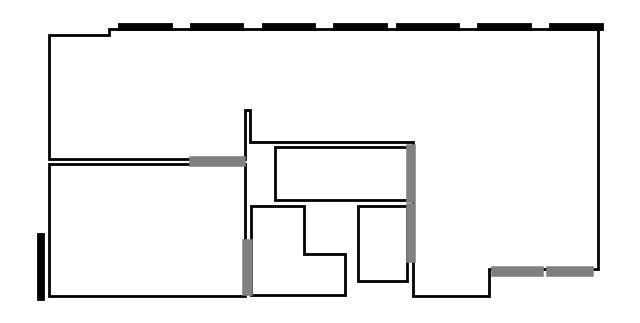

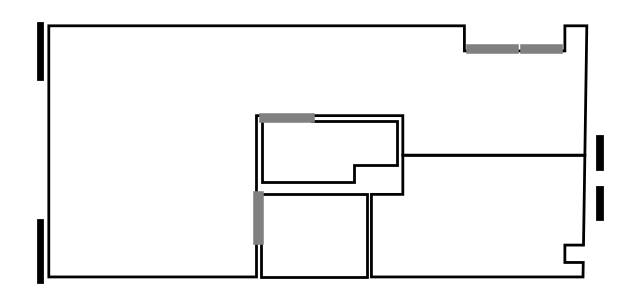

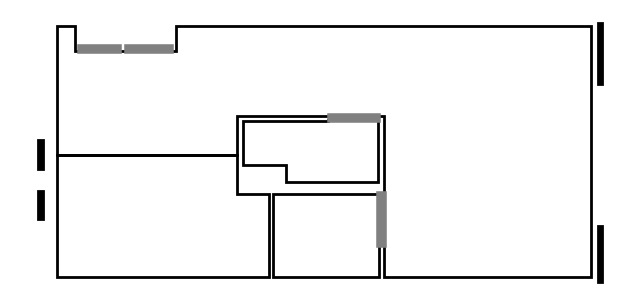

In [14]:
# iterate through units
for i in range(len(units_rooms)):
    # 1. create new axis for every image
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

    # 2. get rooms, doors, windows for unit "i"
    rooms = units_rooms[i]
    doors = units_doors[i]
    windows = units_windows[i]
    unit_name = units_name[i]

    # 3. plot full layout for each (see TW2) - REMOVE THIS
    # _ = rooms_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=1, linestyle='dashed', alpha=0.75)

    # 4. plot units separately
    # 4.1 spaces
    for poly in rooms.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='black', linewidth=2, linestyle='solid')

    # 4.2 doors
    for poly in doors.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="gray", ec='gray', linewidth=4, linestyle='solid')

    # 4.3 windows
    for poly in windows.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="black", ec='black', linewidth=2, linestyle='solid')

    # 5. set axis
    ax.set_aspect('equal')
    ax.axis('off')

    # 6. save figure
    img_name = f"floor={floor_name}-unit={unit_name}.png"
    img_path = os.path.join(img_dir, img_name)
    fig.savefig(img_path, dpi=300)

We can similarly use `matploblib` to load the images from a given folder and image path. The function is `plt.imread(img_path)` and you have to specify the `img_path` as obligatory argument.

In [15]:
img_path = "/content/drive/MyDrive/academia/8 data/KAAN_datasets/STRIJP/dataset/layouts/units/images/floor=04 vierde verdieping-unit=26.png"
img = plt.imread(img_path)
print(img_path)
print(img.shape)
print(img)

/content/drive/MyDrive/academia/8 data/KAAN_datasets/STRIJP/dataset/layouts/units/images/floor=04 vierde verdieping-unit=26.png
(1800, 2400, 4)
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


You can also check the files within a sub-folder by using `os.listdir(img_dir)` for the sub-directory `img_dir`:

In [16]:
# set up plot
file_names = list(os.listdir(img_dir))
print(*file_names, sep="\n")

floor=04 vierde verdieping-unit=43.png
floor=04 vierde verdieping-unit=38.png
floor=04 vierde verdieping-unit=39.png
floor=04 vierde verdieping-unit=34.png
floor=04 vierde verdieping-unit=36.png
floor=04 vierde verdieping-unit=28.png
floor=04 vierde verdieping-unit=30.png
floor=04 vierde verdieping-unit=32.png
floor=04 vierde verdieping-unit=26.png
floor=05 vijfde verdieping-unit=61.png
floor=05 vijfde verdieping-unit=58.png
floor=05 vijfde verdieping-unit=59.png
floor=05 vijfde verdieping-unit=60.png
floor=05 vijfde verdieping-unit=56.png
floor=05 vijfde verdieping-unit=57.png
floor=05 vijfde verdieping-unit=54.png
floor=05 vijfde verdieping-unit=55.png
floor=05 vijfde verdieping-unit=53.png
floor=06 zesde verdieping-unit=72.png
floor=06 zesde verdieping-unit=71.png
floor=06 zesde verdieping-unit=68.png
floor=06 zesde verdieping-unit=73.png
floor=06 zesde verdieping-unit=67.png
floor=06 zesde verdieping-unit=70.png
floor=06 zesde verdieping-unit=65.png
floor=06 zesde verdieping-unit=6

Let's plot them sequentially again.

***Why are the values on the axes different than before?***

Because the values on the axes represent the pixel locations (integers being $[0 , \ldots, W]$ for $x$; $[0, \ldots, H]$ for $y$), and not the real locations.

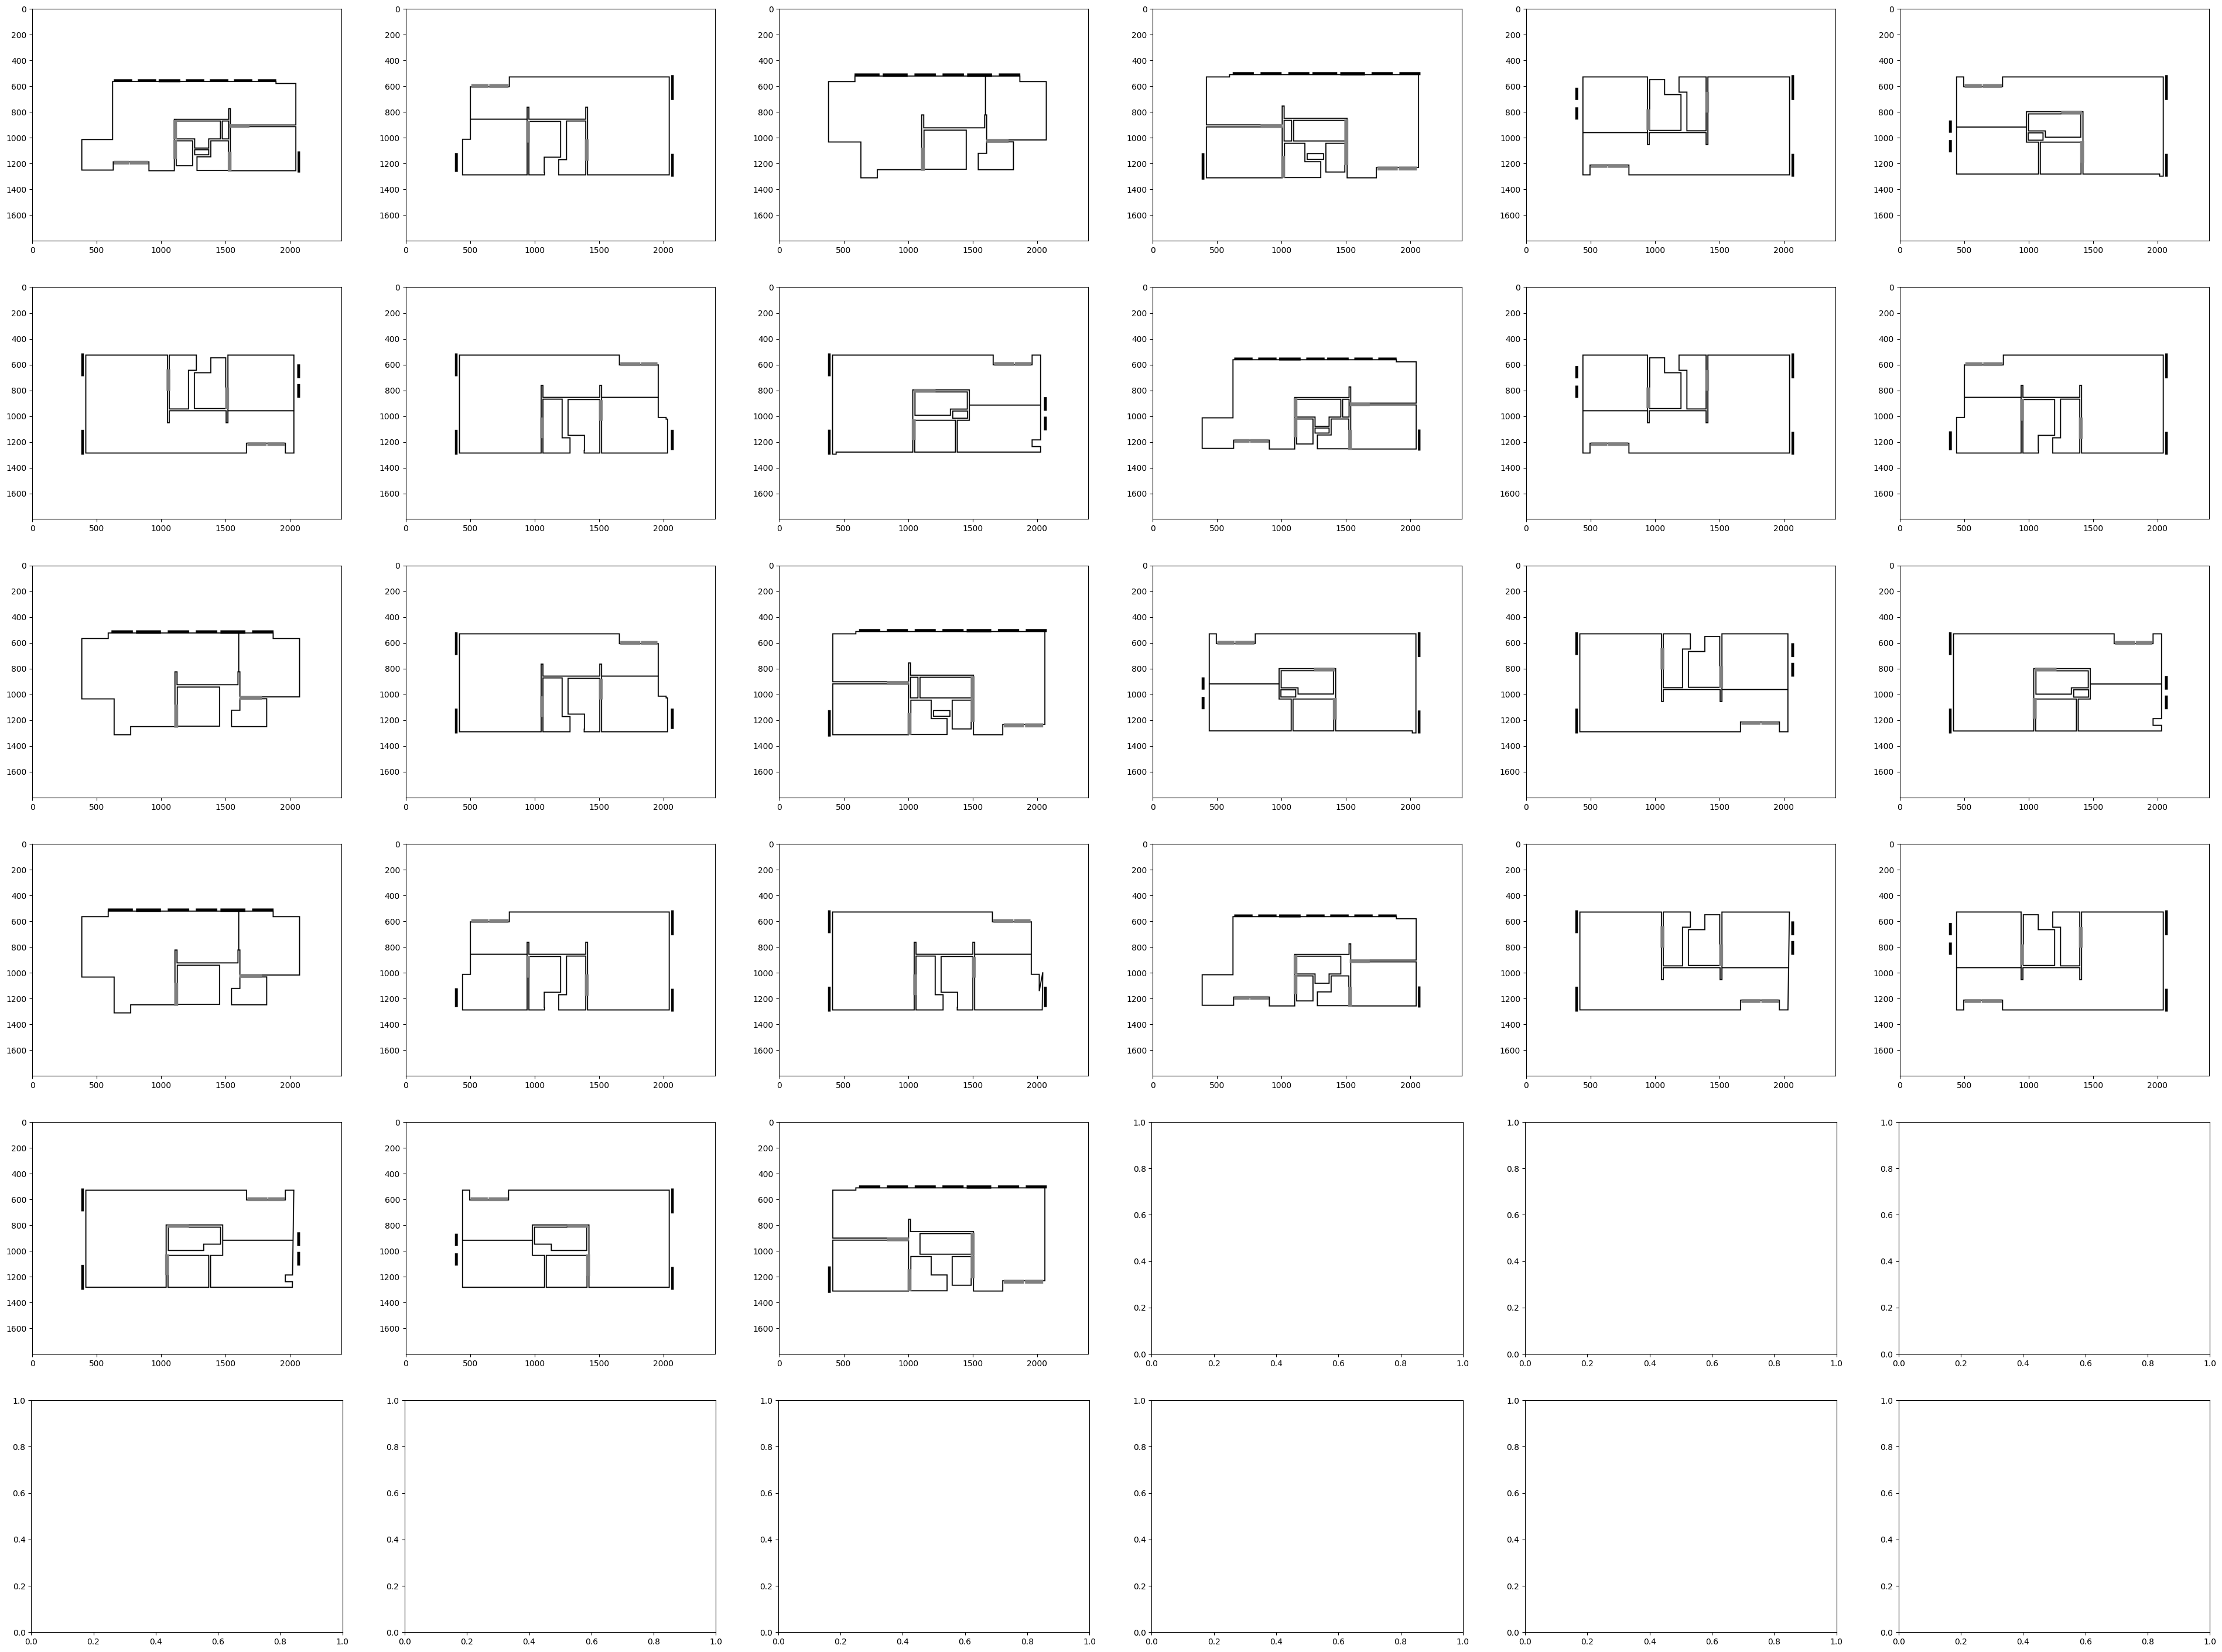

In [17]:
# set up plot
k = int(np.ceil(np.sqrt(len(file_names))))  # determine amount of subplots on the amount of distinct units
_, axs = plt.subplots(k, k, figsize=(8*k, 6*k))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
axs = axs.flatten()

for i in range(len(file_names)):
    ax = axs[i]
    file_name = file_names[i]
    file_path = os.path.join(img_dir, file_name)
    img = plt.imread(file_path)

    ax.imshow(img, cmap='gray')

    # ax.axis('off')

<a name="t3"></a>
## ❄ **Layout as a graph**

The final topic of this tutorial is about a powerful representation of floor layouts that emphasize and make explicit the connections between the individual spaces that compose the layout. We are talking about representing (attributing) a layout as (with) a graph. For floor layouts, the graph that lays bare the pairwise connections between the spaces (door connectivity, adjacency, passage, etc.) is generally known as the accesss graph. You will learn how to extract such a graph-structured object from the composed shape. Moreover, you will learn that such a graph-structured object is not limited to only convey the connections from room to room, but that it can be set up and used as a container to both make explicit the connections between rooms and the room properties / characteristics (like the shape associated with it).

<a name="t3.1"></a>
### 3.1 **The access graph**

> _**Which features (properties, or qualities) are important in designing and evaluating a floor layout ?**_

Just to name a few:

- locations
- orientation
- accessibility
- privacy
- proportions and size
- view to outside

One important aspect that has the potential to capture many of the qualities above is the **connectivity between spaces**. For instance, **access connectivity** means that you can walk from one room to the other; **adjacency** if there exists a wall between the two rooms.

From the connectivity of the individual spaces that compose the floor layout we can determine, to a large extent, many of the listed qualities above. Such connections, however, are neither present in the composed shape as well as rasterized image representation.

> _**Why are the connections between spaces neither present in composed shape as well as image representations?**_

While the connections appear to be present - you are a trained architect to directly see such connections -, they are not explicitly defined in both the composed shape and image representation. (Try to find them yourself!) If we want Python to be able to use the connections explicitly - or implicitly later on - we, hence, should create a new representation.

> _**Which representation makes explicit the relations between objects?**_

You might be familiar with the functional diagram, which explicilty relates the distinct functions (bubbles that represent the distinct functional units, i.e., spaces) with each other (edges). In essence, the functional diagram is, sort of, what we seek. We are, more generally, seeking a **graph**. A graph is collection of nodes connected by edges. In our case **the graph that we seek is a collection of spaces (the nodes) connected by e.g. a door or a wall  (the edges)**. Formally, this is known as an **access graph**; in the figure below drawn on top of the floor plan. "Access" because the graph's edges inform about the accessibility between the spaces. We define two types of edge: access (solid line) or adjacency (dashed line).

</br>

<center>
<img src="https://drive.google.com/uc?export=view&id=1fu_LkoSaXYjWY7NPGzqI-vn_cr-m9ykx" alt="floor-layout" class="center" width="900px">
</center>

We use `networkx` to create and manipulate graphs:





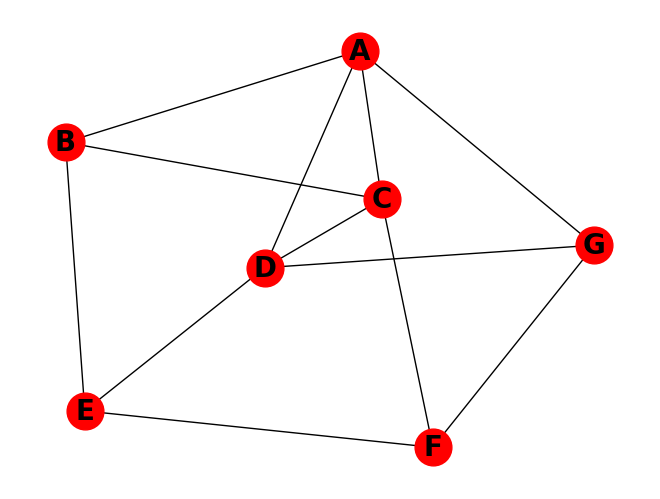

In [18]:
import networkx as nx

# Create a new graph
graph = nx.Graph()

# Add more nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
graph.add_nodes_from(nodes)

# Add more edges to interconnect the nodes
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'A'), ('A', 'D'), ('B', 'E'), ('C', 'F'), ('D', 'G')]
graph.add_edges_from(edges)

# Draw the graph
nx.draw(graph, with_labels=True, node_color='red', font_weight='bold', node_size=700, font_size=20, edge_color='black')

# Show the plot
plt.show()

<a name="t3.2"></a>
### 3.2 **Graph extraction**

> _**Can the graph be extracted from the composed shape? If so, how?**_

The **graphs can be extracted algorithmically by investigating the relations between the shapes and locations of the different rooms, in combination with the shapes and locations of the doors**. How? By checking how close shapes are to each other spatially speaking.

We make use of the `distance` function in `shapely` that operates on two shapes. In shapely, the distance between two shapes is defined as the Euclidean distance (real distance) between the two closest points in the polygons.

For instance, for two polygons `poly1` and `poly2`, the distance is computed as `poly1.distance(poly2)`. Note that `poly2.distance(poly1)` gives the same result.

The following figure elaborates on the graph extraction algorithm in more detail:

</br>

<center>
<img src="https://drive.google.com/uc?export=view&id=1D9tBDd8szfHOZSMhx2u5gHMUXIg1_ccj" alt="floor-layout" class="center" width="500px">
</center>

</br>

In the algorithm text block above, the thresholds on the distances (0.1 for passage, 0.2 for door, and 0.5 are design choices). For every project, these thresholds should be manually tweaked. When tweaking the thresholds, note that the units are in meters.




In [19]:
import networkx as nx
from itertools import combinations

def get_graph(rooms_dict, doors_dict, name, t_passage=0.01, t_door=0.05, t_adjacent=0.5):

    # initialize graph
    graph = nx.Graph()

    # 1. set graph-level attribute: name of unit
    graph.graph["name"] = name

    # get room indices, room labels, room polygon, and door polygons as lists
    indices = np.arange(len(rooms_dict))
    labels = [name for name in rooms_dict.keys()]
    polygons = [poly for poly in rooms_dict.values()]
    door_polygons = [poly for poly in doors_dict.values()]

    # 2. node accumulation
    nodes = {}
    for idx, label, poly in zip(indices, labels, polygons):
        # for the center we use a representative point instead of the real center
        center = poly.representative_point()
        nodes[idx] = {
            "polygon": poly,
            "name": label,
            "centroid": np.array((center.xy[0][0], center.xy[1][0]))
        }

    # add nodes and attributes to graph
    graph.add_nodes_from([(u, v) for u, v in nodes.items()])

    # 3. edge accumulation
    # loop over all node combinations
    edges = []
    for u, v in combinations(indices, 2):

        # extract polygons at u and v
        poly_1 = polygons[u]
        poly_2 = polygons[v]

        edge = False

        # measure distance between polygons
        distance = poly_1.distance(poly_2)

        # check PASSAGE first; if not determine door / adjacent
        if distance < t_passage:
            edges.append([u, v, {'door': True}])
            edge = True


        # check DOOR CONNECTIVITY (overwrite adjacency if necessary)
        else:
            # check whether they intersect with the **same** door
            for poly_d in door_polygons:  # access connectivity
                if (poly_d.distance(poly_1) < t_door) and (poly_d.distance(poly_2) < t_door):
                    edges.append([u, v, {'door': True}])
                    edge = True
                    break
                else:
                    continue

        # check ADJACENCY first; if not determine door / adjacent
        if (not edge) &  (distance < t_adjacent):
            edges.append([u, v, {'door': False}])

    # add edges to graph
    graph.add_edges_from(edges)

    return graph

In [20]:
unit_names = [f"Unit {i}" for i in range(len(units_rooms))]
graphs = [get_graph(rooms_dict, doors_dict, name) for rooms_dict, doors_dict, name in zip(units_rooms, units_doors, unit_names)]

print(*graphs, sep="\n")

Graph named 'Unit 0' with 4 nodes and 3 edges
Graph named 'Unit 1' with 5 nodes and 7 edges
Graph named 'Unit 2' with 4 nodes and 5 edges
Graph named 'Unit 3' with 4 nodes and 5 edges
Graph named 'Unit 4' with 4 nodes and 5 edges
Graph named 'Unit 5' with 4 nodes and 5 edges
Graph named 'Unit 6' with 5 nodes and 7 edges
Graph named 'Unit 7' with 4 nodes and 6 edges
Graph named 'Unit 8' with 4 nodes and 6 edges


In [21]:
def plot_graph(graph, ax,
               c_node='black', c_edge='black',  # coloring
               dw_edge=False, pos=None,  # edge type and node positioning
               node_size=10, edge_size=10):  # node and edge sizes

    """
    Plots the topological graph structure of a floor plan.
    Nodes can be colored based on the room category;
    Two possible edge types (if you want to show them in the first place):
    1) access connectivity (passage) e.g. by door; 2) adjacency e.g. by wall;
    Node positions are in 2D and could be for example the room centroids.
    """

    # Determine node position (if None is given)
    if not pos:
        pos = nx.spring_layout(graph, seed=7)  # random position for the nodes

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_size=node_size, node_color=c_node, ax=ax)

    # Draw edges
    if dw_edge:

        # Door connections
        edges = [(u, v) for (u, v, d) in graph.edges(data=True) if d["door"]]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color=c_edge,
                               width=edge_size, ax=ax)

        # Adjacent connections
        edges = [(u, v) for (u, v, d) in graph.edges(data=True) if not d["door"]]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color=c_edge,
                               width=edge_size, style="dashed", ax=ax)
    else:
        nx.draw_networkx_edges(graph, pos, edge_color=c_edge,
                               width=edge_size, ax=ax)

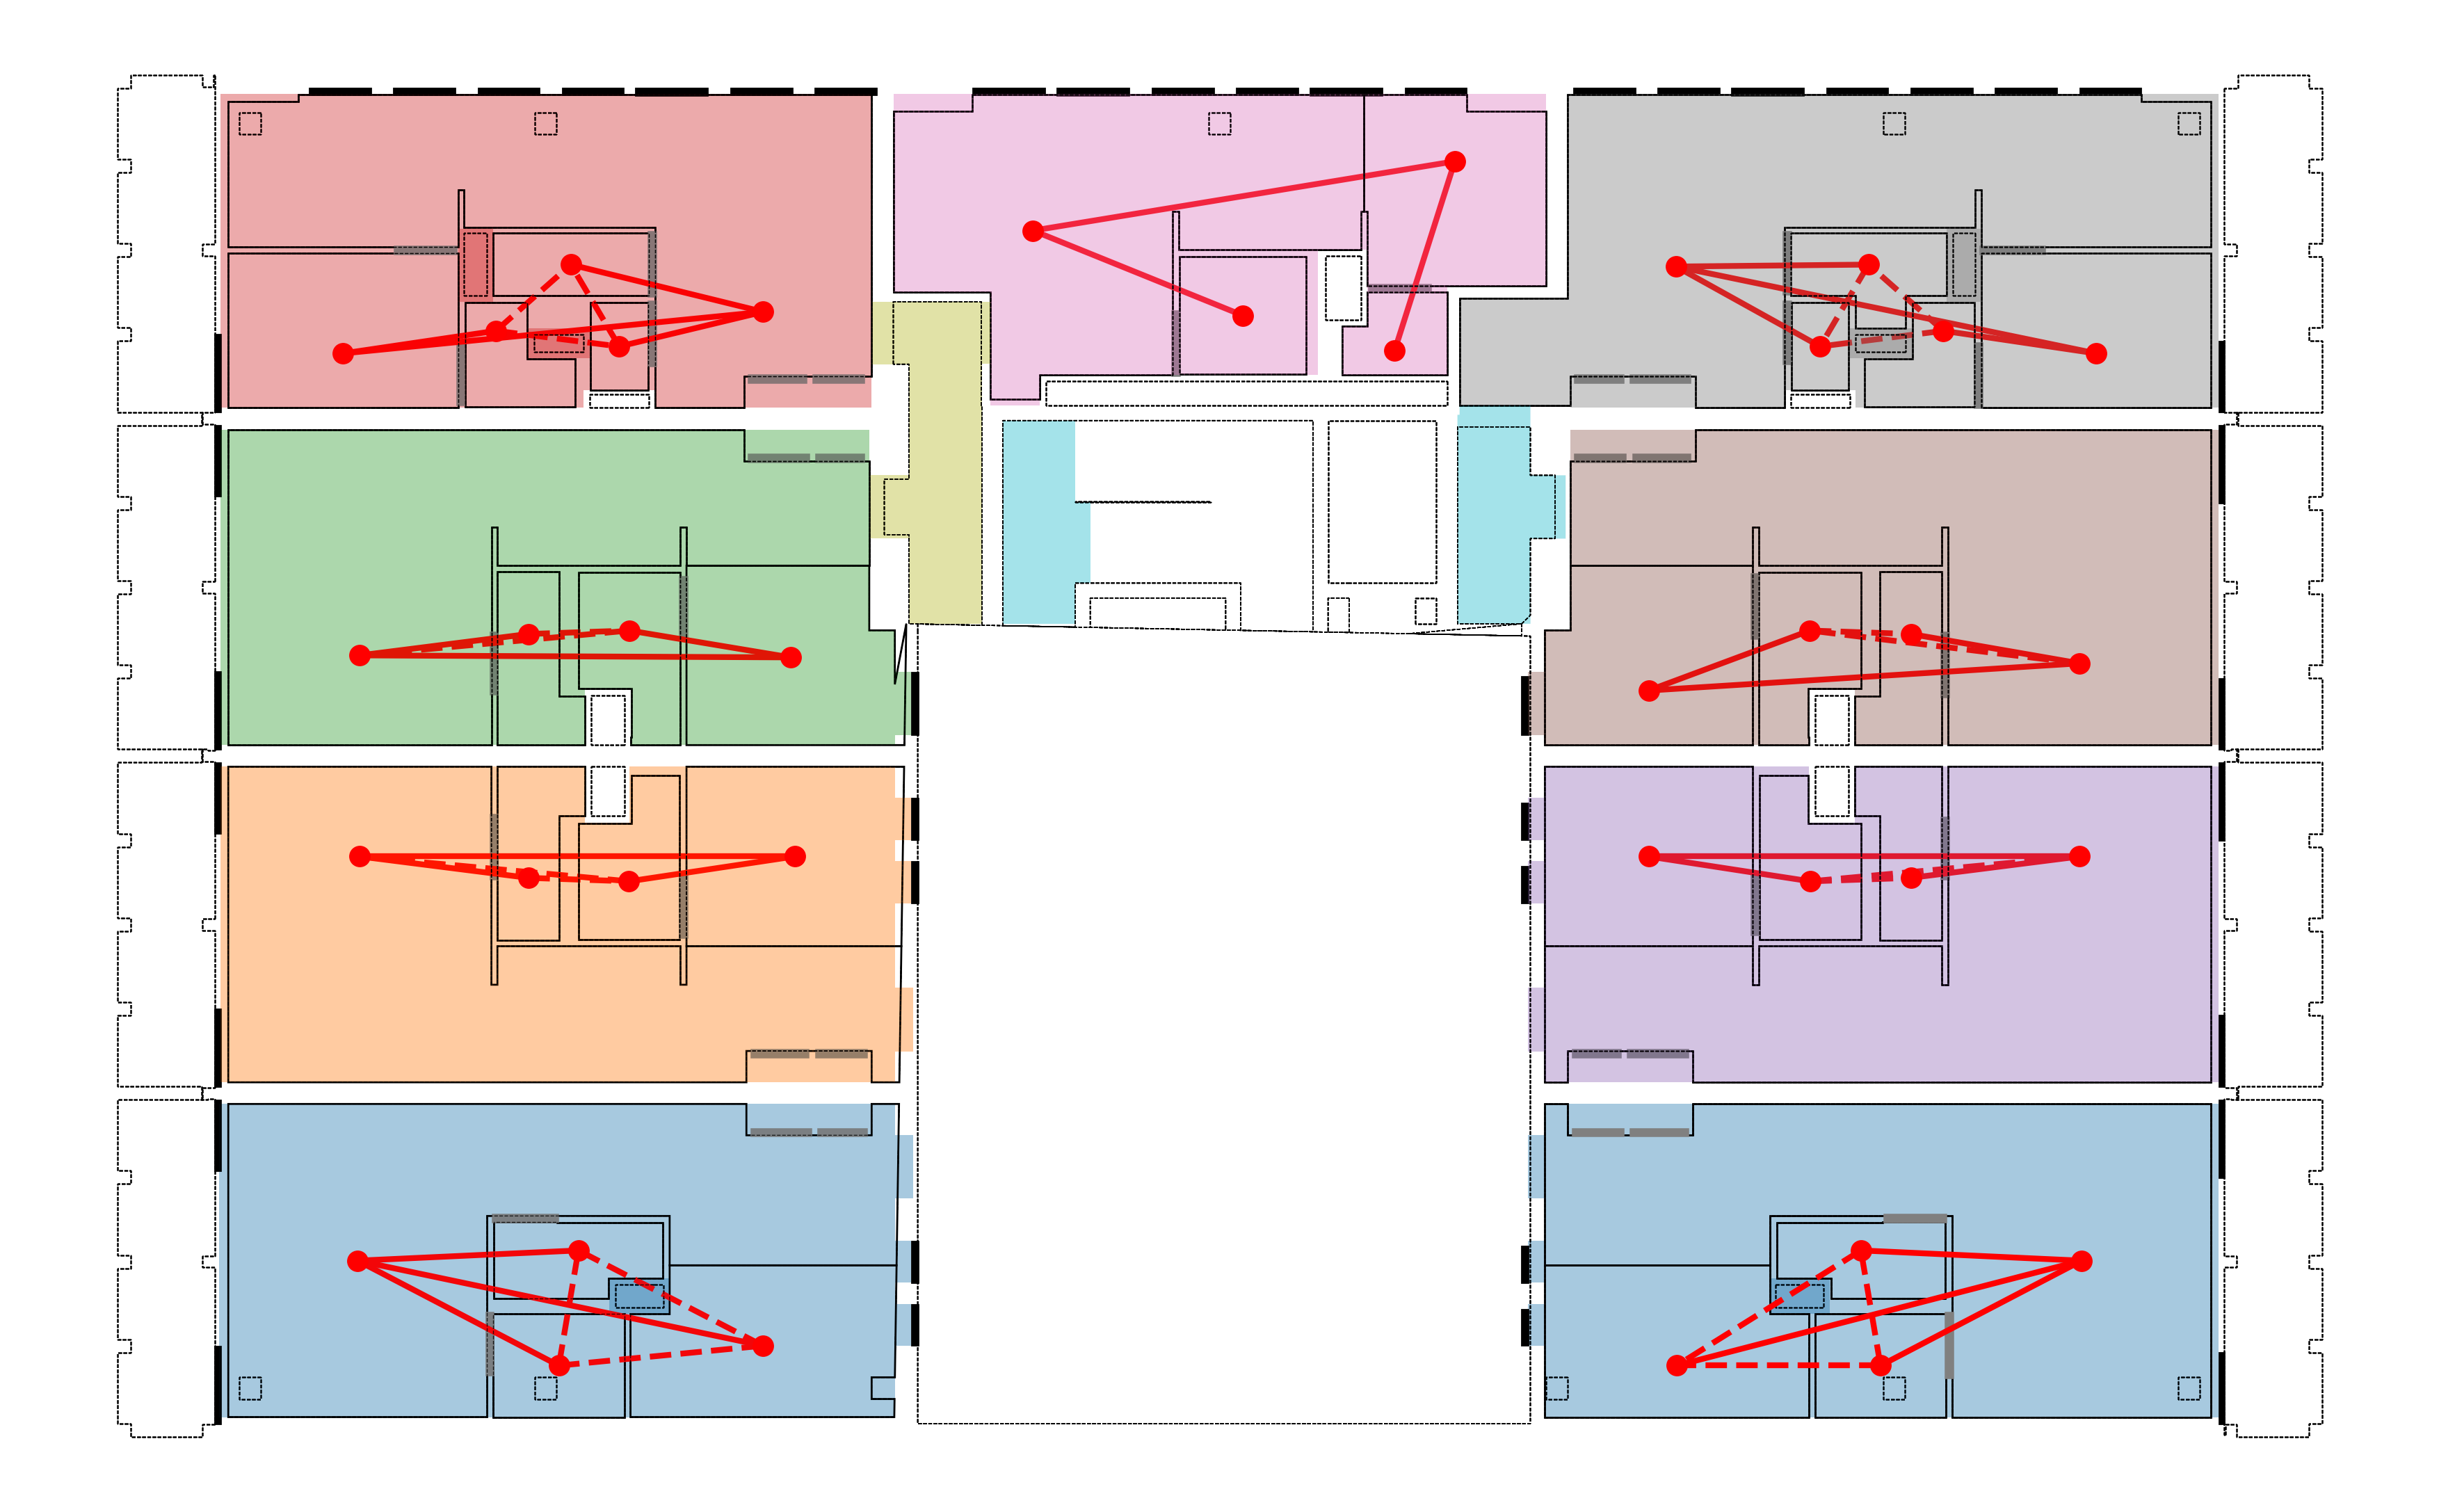

In [22]:
# plotting
fs = 30
_, ax = plt.subplots(1, 1, figsize=(fs*1.5, fs))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# iterate through units
for i in range(len(units_rooms)):
    # # 1. get current axis
    # ax = axs[i]

    # 2. get rooms, doors, windows for unit "i"
    rooms = units_rooms[i]
    doors = units_doors[i]
    windows = units_windows[i]
    name = units_name[i]

    # 3. plot full layout for each (see TW2) - REMOVE THIS
    _ = units_gdf.plot(ax=ax, column="name", legend=False, edgecolor="none", alpha=0.05)
    _ = rooms_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=1, linestyle='dashed', alpha=0.75)

    # 4. plot units separately
    # 4.1 spaces
    for poly in rooms.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='black', linewidth=2, linestyle='solid')

    # 4.2 doors
    for poly in doors.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="gray", ec='gray', linewidth=4, linestyle='solid')

    # 4.3 windows
    for poly in windows.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="black", ec='black', linewidth=2, linestyle='solid')

    # 3. graph
    graph = get_graph(rooms, doors, unit_name)
    # polygons = [polygon for _, polygon in graph.nodes(data="polygon")]
    pos = {n: np.array(graph.nodes[n]['centroid']) for n in graph.nodes}

    plot_graph(graph, ax, pos=pos, c_node='red',
           dw_edge=True, c_edge=['red']*4,
           node_size=fs*15, edge_size=fs/5)

    # set axis
    # ax.set_title(unit_name)
    ax.set_aspect('equal')
    ax.axis('off')

Let's save them in memory, like we did before with the images:

- create new sub-folder, *e.g.*,  `./dataset/layouts/units/graphs`
- populate with graphs (similar named as images)

In [23]:
# create a sub-directory
graph_dir = os.path.join(data_path, "dataset/layouts/units/graphs")
os.makedirs(graph_dir, exist_ok=True)

# note: your current working directory has not changed

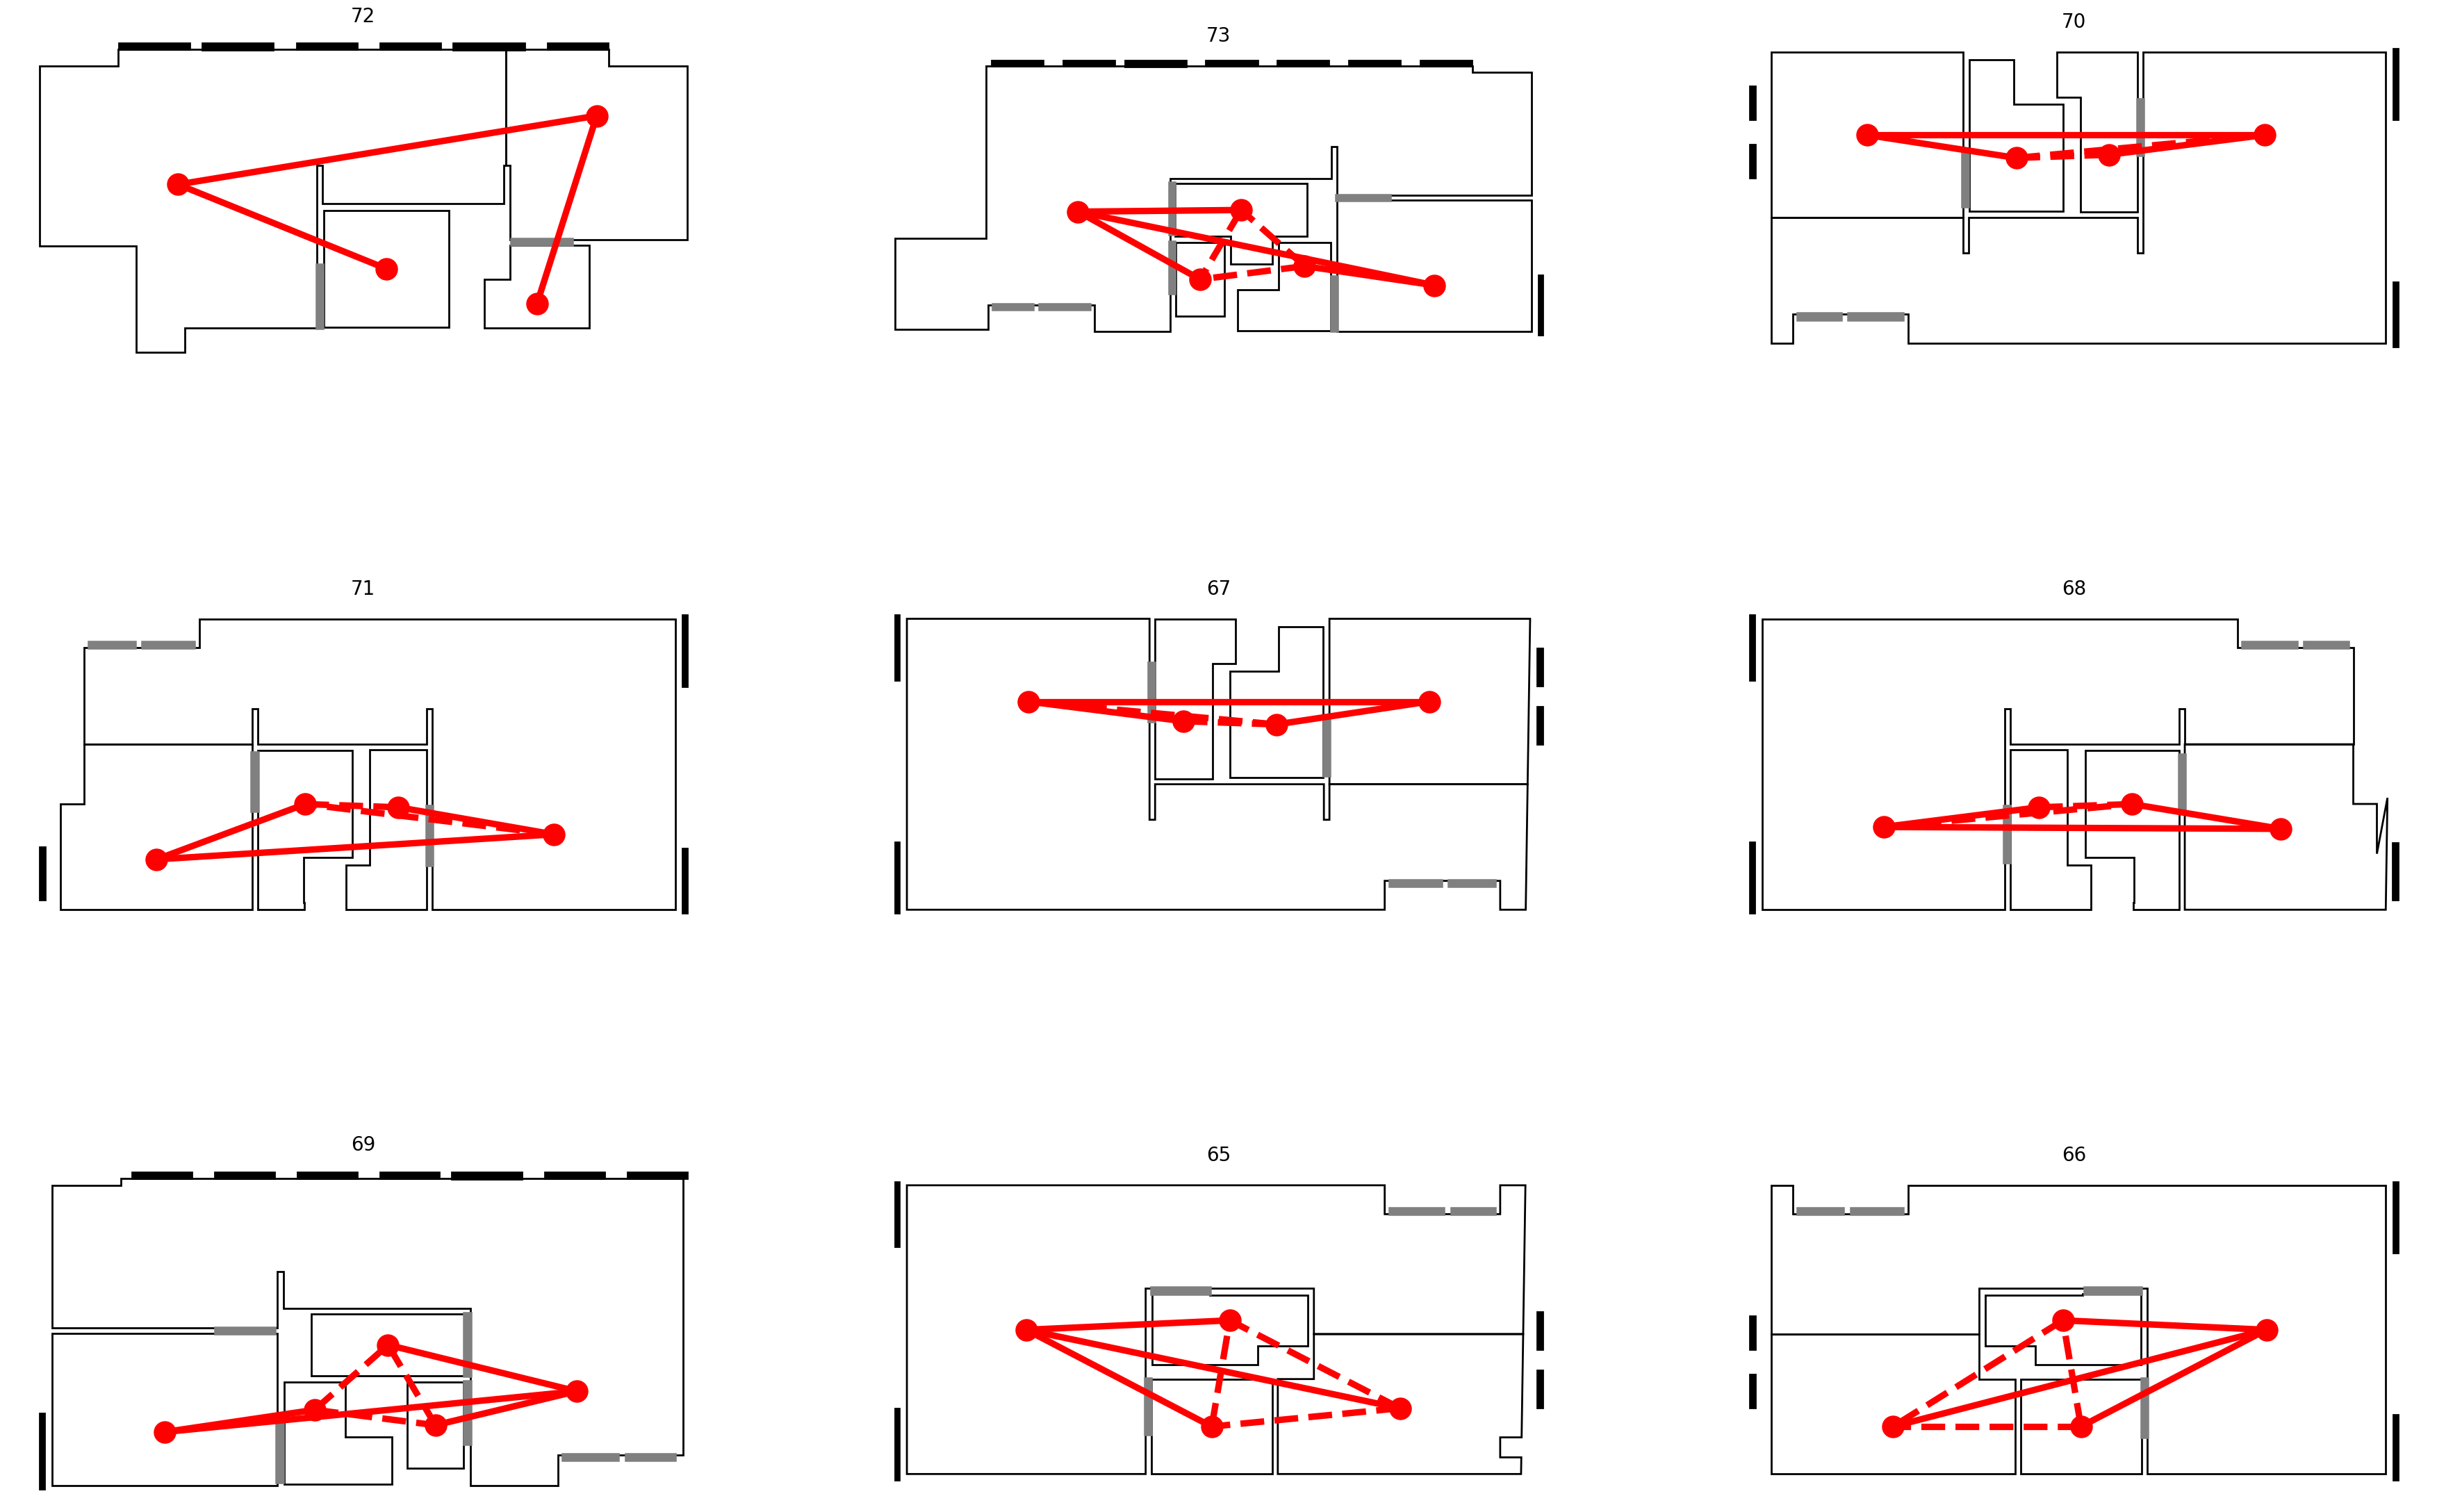

In [24]:
import pickle

def save_pickle(object_to_save, file_path):
    """
    Save an object to a specified file path using pickle.

    Parameters:
    - object_to_save: The Python object to be saved.
    - file_path: The path (including filename) where the object should be saved.
    """
    with open(file_path, "wb") as file:
        pickle.dump(object_to_save, file)

# plotting
fs = 10
k = int(np.ceil(np.sqrt(len(units_rooms))))  # determine amount of subplots on the amount of distinct units
_, axs = plt.subplots(k, k, figsize=(fs*1.5*k, fs*k))  # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
axs = axs.flatten()

# iterate through units
for i in range(len(units_rooms)):
    # 1. get current axis
    ax = axs[i]

    # 2. get rooms, doors, windows for unit "i"
    rooms = units_rooms[i]
    doors = units_doors[i]
    windows = units_windows[i]
    unit_name = units_name[i]

    # 3. plot full layout for each (see TW2) - REMOVE THIS
    # _ = rooms_gdf.plot(ax=ax, column="name", legend=False, edgecolor='black', facecolor="none", linewidth=1, linestyle='dashed', alpha=0.75)

    # for poly in
    # 4.1 spaces
    for poly in rooms.values():
        plot_polygon_shapely(ax, poly, fc="none", ec='black', linewidth=2, linestyle='solid')

    # 4.2 doors
    for poly in doors.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="gray", ec='gray', linewidth=4, linestyle='solid')

    # 4.3 windows
    for poly in windows.values():
        poly = poly.minimum_rotated_rectangle
        plot_polygon_shapely(ax, poly, fc="black", ec='black', linewidth=2, linestyle='solid')

    # 5. graph
    graph = get_graph(rooms, doors, unit_name, t_door=0.1)
    # polygons = [polygon for _, polygon in graph.nodes(data="polygon")]
    pos = {n: np.array(graph.nodes[n]['centroid']) for n in graph.nodes}

    plot_graph(graph, ax, pos=pos, c_node='red',
           dw_edge=True, c_edge=['red']*4,
           node_size=fs*50, edge_size=fs/1.5)

    # 6. save graph using nx.write_graphml
    graph_name = f"floor={floor_name}-unit={unit_name}.graphml"
    graph_path = os.path.join(graph_dir, graph_name)
    save_pickle(graph, graph_path)

    # set axis
    ax.set_title(unit_name, fontsize=20)
    ax.set_aspect('equal')
    ax.axis('off')

<a name="a"></a>
## 🈴 **Assignment**



### **Description**

Develop your own flexible code to convert the data frames of your projects into a unit layout dataset for which you have both image and graph representations in different folders.

### **Evaluation**

- **Composed shape**
    - 3p: create a single function that filters all distinct units (as composed shapes of the spaces) for each floor-level plan in your project.
- **Image**
    - 2p: a function that converts the composed shape representations of the units into a raster image
    - 1p: a function that creates all unit's corresponding images
- **Graph**
    - 2p: create a single function that extract all attributed access graphs from the composhed shape representations of the units.
- **Folder**
    - 1p: create code block that creates a proper folder structure
    - 1p: populate sub-folders with images and graphs

### **Output**

**Write your findings and interpretation in a new notebook** and name it **"A3_building-blueprint-\<name\>.ipynb"**.